In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

In [5]:
insurance_data.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [6]:
insurance_data.corr()

C:\Users\Pritam Seth\AppData\Local\Temp\ipykernel_20752\328757087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

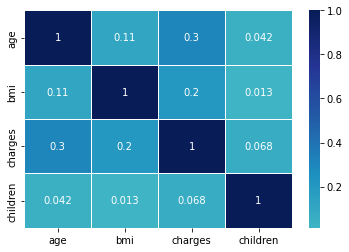

In [7]:
corrs = insurance_data[['age', 'bmi', 'charges', 'children']].corr()
sns.heatmap(corrs, linewidths = 0.5, annot=True, center=0, cmap="YlGnBu")

Text(0.5, 1.0, 'Histogram of Age')

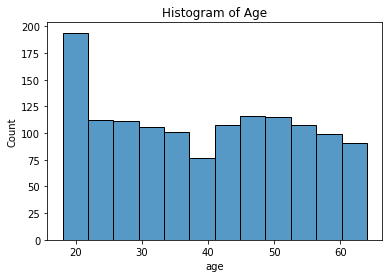

In [8]:
sns.histplot(insurance_data['age'])
plt.title('Histogram of Age')

In [9]:
top_ages=insurance_data.age.value_counts().head(10)
top_ages

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: age, dtype: int64

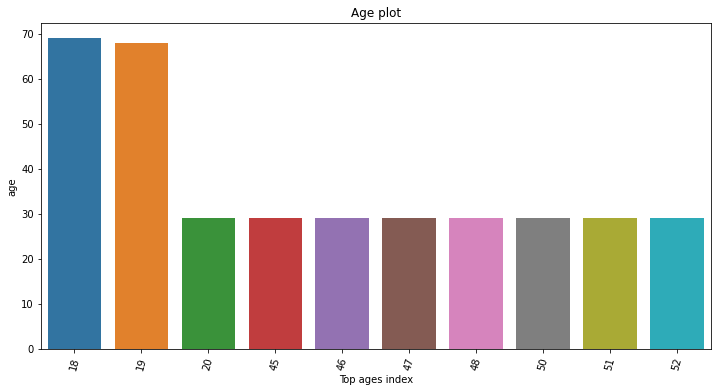

In [10]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Age plot')
plt.xlabel('Top ages index')
plt.ylabel('Top ages ')
sns.barplot(x=top_ages.index, y=top_ages);

Text(0.5, 1.0, 'Scatterplot of ho')

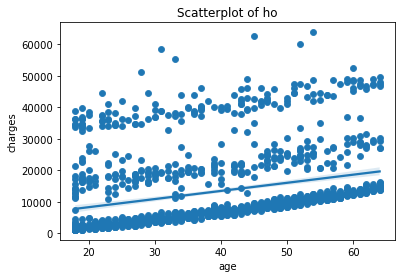

In [11]:
sns.scatterplot(x=insurance_data['age'],y=insurance_data['charges'])
sns.regplot(x=insurance_data['age'],y=insurance_data['charges'])
plt.title('Scatterplot of ho')

Text(0.5, 1.0, 'Sex Distribution')

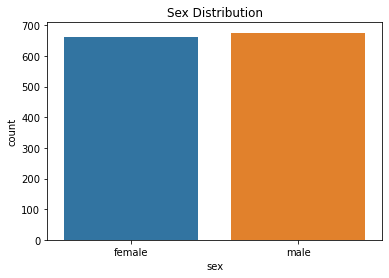

In [12]:
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')

In [13]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Distribution of sex and their insurance charges'}, xlabel='charges', ylabel='Count'>

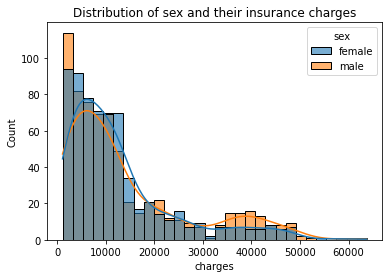

In [14]:
plt.title('Distribution of sex and their insurance charges')
sns.histplot(insurance_data,x='charges',hue='sex',kde=True,alpha=0.6,linewidth=1)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

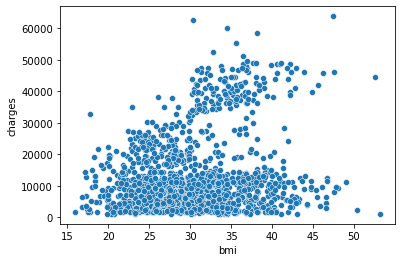

In [15]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

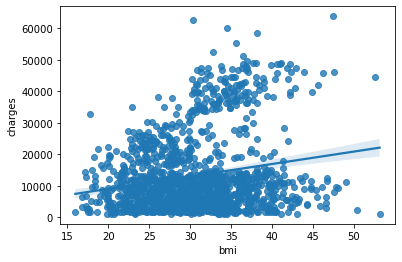

In [16]:
sns.regplot(x=insurance_data['bmi'],y=insurance_data['charges'])

Text(0.5, 1.0, 'Scatterplot of how smoking affects BMI and Insurance Charges')

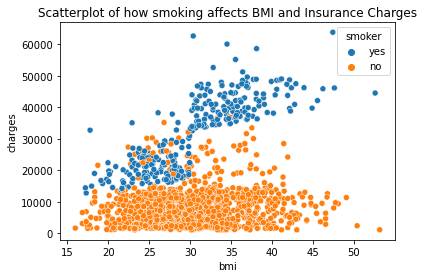

In [17]:
sns.scatterplot(x=insurance_data['bmi'],y=insurance_data['charges'],hue=insurance_data['smoker'])
plt.title('Scatterplot of how smoking affects BMI and Insurance Charges')

<AxesSubplot:xlabel='region', ylabel='count'>

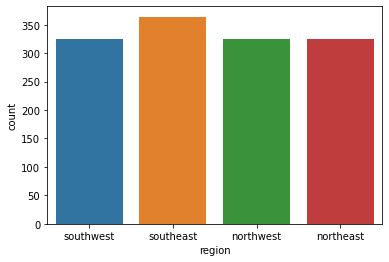

In [18]:
sns.countplot(x='region',data=insurance_data)

Text(0.5, 1.0, 'Histogram of insurance charges by Region')

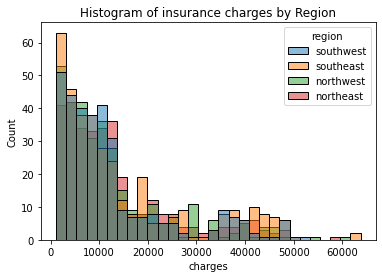

In [19]:
sns.histplot(data=insurance_data,x='charges',hue='region')
plt.title('Histogram of insurance charges by Region')

In [20]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Children distribution')

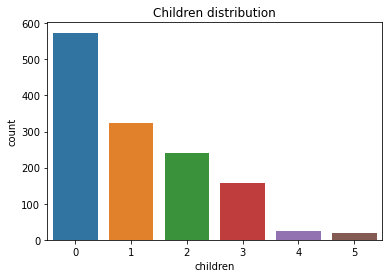

In [21]:
sns.countplot(x='children',data=insurance_data)
plt.title('Children distribution')

<AxesSubplot:xlabel='children', ylabel='charges'>

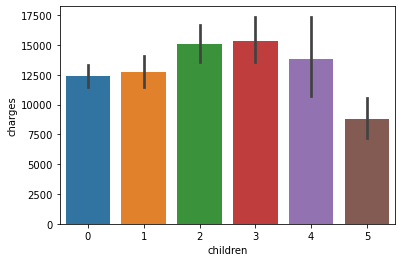

In [22]:
sns.barplot(x=insurance_data['children'],y=insurance_data['charges'])

In [23]:
#Encoding sex column
insurance_data.replace({'sex': {'male':0, 'female':1}}, inplace=True)
#Encoding smoker column
insurance_data.replace({'smoker': {'yes':0, 'no':1}}, inplace=True) 
#Encoding region column
insurance_data.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [24]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# MACHINE LEARNING MODEL

In [25]:
y=insurance_data.charges

In [26]:
insurance_features=['age','sex','bmi','children','smoker', 'region']
X=insurance_data[insurance_features]

In [27]:
#viewing our features
X.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]>

In [28]:
train_X,test_X,train_y,test_y=train_test_split(X,y, test_size=0.2, random_state=2)

In [29]:
print(X.shape,train_X.shape,test_X.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
insurance_model = LinearRegression()
insurance_model.fit(train_X,train_y)
#predict charges on training data
train_predict = insurance_model.predict(train_X)

In [31]:
test_predict = insurance_model.predict(test_X)

In [32]:
r2_train = metrics.r2_score(train_y,train_predict)
print('R squared value: ', r2_train)
#r squared for validation data
r2_test = metrics.r2_score(test_y,test_predict)
print('R squared value; ', r2_test)

R squared value:  0.751505643411174
R squared value;  0.7447273869684077


In [33]:
train_predict

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [34]:
print("MAPE Score: %.2f"%(mean_absolute_percentage_error(test_y,test_predict)*100))
print("MAE Score: %.2f"%(mean_absolute_error(test_y,test_predict)*100))

MAPE Score: 47.15
MAE Score: 426721.38


In [35]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd

# Function to calculate the premium based on user input
def calculate_premium():
    try:
        age = int(age_entry.get())
        sex = sex_var.get().lower()
        bmi = float(bmi_entry.get())
        children = int(children_entry.get())
        smoker = smoker_var.get().lower()
        region = region_var.get().lower()

        # Create a dictionary to match the format of your training data
        user_data = {
            'age': [age],
            'sex': [sex],
            'bmi': [bmi],
            'children': [children],
            'smoker': [smoker],
            'region': [region]
        }

        # Preprocess the user input to match the format of the training data
        user_input = pd.DataFrame(user_data)

        # Encode categorical features
        categorical_mapping = {
            'sex': {'male': 0, 'female': 1},
            'smoker': {'yes': 0, 'no': 1},
            'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3},
            # Add more mappings for other categorical features if needed
        }

        # Apply label encoding to the user input
        for feature, mapping in categorical_mapping.items():
            user_input[feature] = user_input[feature].map(mapping)

        # Make the prediction
        prediction = insurance_model.predict(user_input)

        # Display the result
        result_label.config(text=f"Predicted insurance premium: ${prediction[0]:.2f}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for age, BMI, and children.")

# Create the main window
root = tk.Tk()
root.title("Insurance Premium Calculator")

# Create and set up input fields and labels
age_label = ttk.Label(root, text="Age:")
age_label.pack()
age_entry = ttk.Entry(root)
age_entry.pack()

sex_label = ttk.Label(root, text="Sex:")
sex_label.pack()
sex_var = tk.StringVar(value="Male")
sex_combobox = ttk.Combobox(root, textvariable=sex_var, values=["Male", "Female"])
sex_combobox.pack()

bmi_label = ttk.Label(root, text="BMI:")
bmi_label.pack()
bmi_entry = ttk.Entry(root)
bmi_entry.pack()

children_label = ttk.Label(root, text="Number of Children:")
children_label.pack()
children_entry = ttk.Entry(root)
children_entry.pack()

smoker_label = ttk.Label(root, text="Smoker:")
smoker_label.pack()
smoker_var = tk.StringVar(value="Yes")
smoker_combobox = ttk.Combobox(root, textvariable=smoker_var, values=["Yes", "No"])
smoker_combobox.pack()

region_label = ttk.Label(root, text="Region:")
region_label.pack()
region_var = tk.StringVar(value="Southeast")
region_combobox = ttk.Combobox(root, textvariable=region_var, values=["Southeast", "Southwest", "Northeast", "Northwest"])
region_combobox.pack()

calculate_button = ttk.Button(root, text="Calculate Premium", command=calculate_premium)
calculate_button.pack()

result_label = ttk.Label(root, text="")
result_label.pack()

# Start the tkinter main loop
root.mainloop()


In [36]:
"""
# User input and prediction
age = int(input("Enter age: "))
sex = input("Enter sex (male or female): ").lower()  # Convert to lowercase for consistency
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = input("Smoker (yes or no): ").lower()  # Convert to lowercase for consistency
#region = 'southeast'
region = input("Enter region (southeast, southwest, northeast, northwest): ").lower()
###
#age = 30
#sex = 'female'
#bmi = 33.77
#children = 0
#smoker = 'no'
#region = 'southeast'

user_data = {
    'age': [age],
    'sex': [sex],
    'bmi': [bmi],
    'children': [children],
    'smoker': [smoker],
    'region': [region]
}

# Preprocess the user input to match the format of the training data
user_input = pd.DataFrame(user_data)

# Encode categorical features and convert time columns
categorical_mapping = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'yes': 0, 'no': 1},
    'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3},
    # Add more mappings for other categorical features if needed
}

# Apply label encoding to the user input
for feature, mapping in categorical_mapping.items():
    user_input[feature] = user_input[feature].map(mapping)


# Make the prediction
prediction = insurance_model.predict(user_input)

print(f"Your insurance premium will be : {prediction[0]}")

"""

'\n# User input and prediction\nage = int(input("Enter age: "))\nsex = input("Enter sex (male or female): ").lower()  # Convert to lowercase for consistency\nbmi = float(input("Enter BMI: "))\nchildren = int(input("Enter number of children: "))\nsmoker = input("Smoker (yes or no): ").lower()  # Convert to lowercase for consistency\n#region = \'southeast\'\nregion = input("Enter region (southeast, southwest, northeast, northwest): ").lower()\n###\n#age = 30\n#sex = \'female\'\n#bmi = 33.77\n#children = 0\n#smoker = \'no\'\n#region = \'southeast\'\n\nuser_data = {\n    \'age\': [age],\n    \'sex\': [sex],\n    \'bmi\': [bmi],\n    \'children\': [children],\n    \'smoker\': [smoker],\n    \'region\': [region]\n}\n\n# Preprocess the user input to match the format of the training data\nuser_input = pd.DataFrame(user_data)\n\n# Encode categorical features and convert time columns\ncategorical_mapping = {\n    \'sex\': {\'male\': 0, \'female\': 1},\n    \'smoker\': {\'yes\': 0, \'no\': 1},\n 